<a href="https://colab.research.google.com/github/Krylze/Data-Behavior-Patterns/blob/main/Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos original

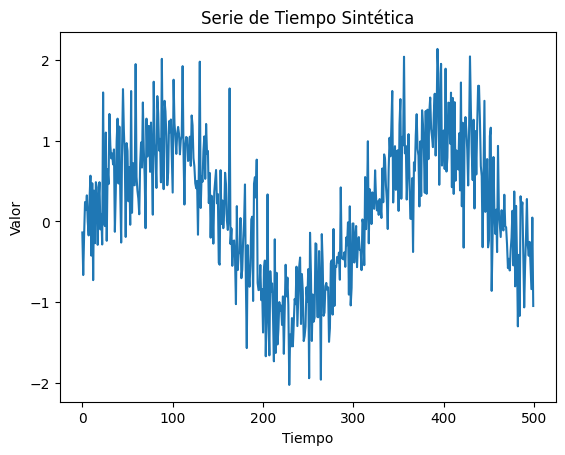

In [ ]:
# prompt: genera una serie de tiempo sintetica de unos 500 elementos y graficala

import numpy as np
import matplotlib.pyplot as plt

# Generar una serie de tiempo sintética con 500 elementos
tiempo = np.arange(500)
serie_tiempo = np.sin(0.02 * tiempo) + 0.5 * np.random.randn(500)

# Graficar la serie de tiempo
plt.plot(tiempo, serie_tiempo)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Serie de Tiempo Sintética')
plt.show()


Datos original que se transformo con Fourier

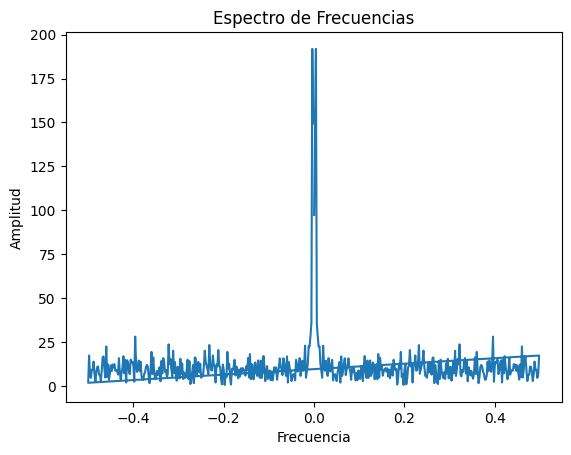

In [ ]:
# prompt: Aplica la transformada de fourier a la serie que generamos

# Calcular la transformada de Fourier
fourier = np.fft.fft(serie_tiempo)

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(len(serie_tiempo))

# Graficar el espectro de frecuencias
plt.plot(frecuencias, np.abs(fourier))
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Espectro de Frecuencias')
plt.show()


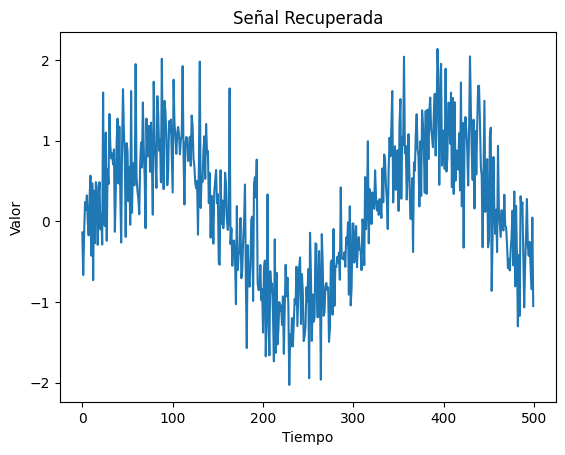

In [ ]:
# prompt: Dame el codigo para recuperar la señal

# Invertir la transformada de Fourier para recuperar la señal
serie_tiempo_recuperada = np.fft.ifft(fourier)

# Graficar la señal recuperada
plt.plot(tiempo, serie_tiempo_recuperada.real)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Señal Recuperada')
plt.show()


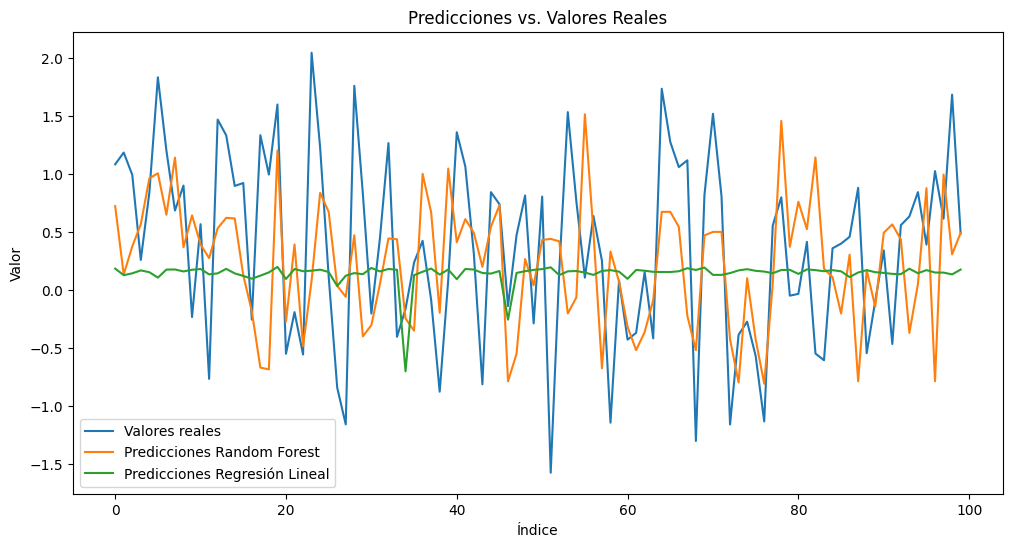

Error cuadrático medio (Random Forest): 0.6895188345272328
Error cuadrático medio (Regresión Lineal): 0.6810009226686391


In [ ]:
# prompt: Utiliza los datos transformada para entrenar un random forrest y  una regresion con grafica

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparar los datos para el entrenamiento
X = np.abs(fourier).reshape(-1, 1)  # Usamos la amplitud de la transformada como entrada
y = serie_tiempo  # La serie de tiempo original como salida

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Entrenar una regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Calcular el error cuadrático medio
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

# Graficar las predicciones vs. los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores reales')
plt.plot(rf_predictions, label='Predicciones Random Forest')
plt.plot(lr_predictions, label='Predicciones Regresión Lineal')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()

print(f"Error cuadrático medio (Random Forest): {rf_mse}")
print(f"Error cuadrático medio (Regresión Lineal): {lr_mse}")


Epoch 1/100
391/391 - 3s - 6ms/step - loss: 0.3094
Epoch 2/100
391/391 - 1s - 4ms/step - loss: 0.2717
Epoch 3/100
391/391 - 2s - 5ms/step - loss: 0.2687
Epoch 4/100
391/391 - 1s - 2ms/step - loss: 0.2713
Epoch 5/100
391/391 - 1s - 2ms/step - loss: 0.2683
Epoch 6/100
391/391 - 1s - 2ms/step - loss: 0.2706
Epoch 7/100
391/391 - 1s - 2ms/step - loss: 0.2691
Epoch 8/100
391/391 - 1s - 3ms/step - loss: 0.2682
Epoch 9/100
391/391 - 1s - 2ms/step - loss: 0.2582
Epoch 10/100
391/391 - 1s - 2ms/step - loss: 0.2664
Epoch 11/100
391/391 - 1s - 2ms/step - loss: 0.2586
Epoch 12/100
391/391 - 1s - 3ms/step - loss: 0.2655
Epoch 13/100
391/391 - 1s - 4ms/step - loss: 0.2607
Epoch 14/100
391/391 - 1s - 4ms/step - loss: 0.2675
Epoch 15/100
391/391 - 2s - 5ms/step - loss: 0.2642
Epoch 16/100
391/391 - 1s - 2ms/step - loss: 0.2643
Epoch 17/100
391/391 - 1s - 3ms/step - loss: 0.2611
Epoch 18/100
391/391 - 1s - 3ms/step - loss: 0.2585
Epoch 19/100
391/391 - 1s - 3ms/step - loss: 0.2528
Epoch 20/100
391/391 

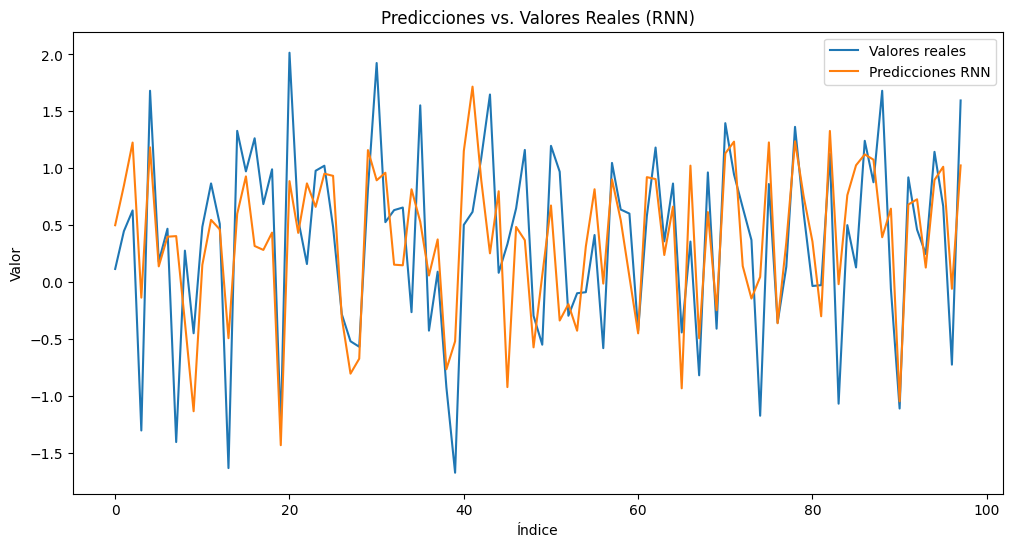

Error cuadrático medio (RNN): 0.3751927677190655


In [ ]:
# prompt: Dame el codigo para el RNN

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparar los datos para el RNN
# La entrada al RNN serán secuencias de la serie de tiempo
look_back = 10  # Longitud de la secuencia de entrada
X, y = [], []
for i in range(len(serie_tiempo) - look_back - 1):
    a = serie_tiempo[i:(i + look_back)]
    X.append(a)
    y.append(serie_tiempo[i + look_back])

X = np.array(X)
y = np.array(y)

# Redimensionar la entrada para que tenga la forma (muestras, pasos de tiempo, características)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo RNN (LSTM)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Realizar predicciones en el conjunto de prueba
rnn_predictions = model.predict(X_test)

# Calcular el error cuadrático medio
rnn_mse = mean_squared_error(y_test, rnn_predictions)

# Graficar las predicciones vs. los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores reales')
plt.plot(rnn_predictions, label='Predicciones RNN')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Predicciones vs. Valores Reales (RNN)')
plt.legend()
plt.show()

print(f"Error cuadrático medio (RNN): {rnn_mse}")


In [ ]:
# prompt: Dame el codigo para el cnn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# ... (Código anterior para generar la serie de tiempo y la transformada de Fourier) ...

# Preparar los datos para la CNN
# La entrada a la CNN serán secuencias de la serie de tiempo
look_back = 10  # Longitud de la secuencia de entrada
X, y = [], []
for i in range(len(serie_tiempo) - look_back - 1):
    a = serie_tiempo[i:(i + look_back)]
    X.append(a)
    y.append(serie_tiempo[i + look_back])

X = np.array(X)
y = np.array(y)

# Redimensionar la entrada para que tenga la forma (muestras, pasos de tiempo, características)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Realizar predicciones en el conjunto de prueba
cnn_predictions = model.predict(X_test)

# Calcular el error cuadrático medio
cnn_mse = mean_squared_error(y_test, cnn_predictions)

# Graficar las predicciones vs. los valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores reales')
plt.plot(cnn_predictions, label='Predicciones CNN')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Predicciones vs. Valores Reales (CNN)')
plt.legend()
plt.show()

print(f"Error cuadrático medio (CNN): {cnn_mse}")
